In [73]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [74]:
# Loading the data
data= pd.read_csv("boston_train.csv")
data.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [75]:
# Drop the 'ID' column
data = data.drop('ID', axis=1)

In [76]:
data.keys()

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [78]:
data.shape

(333, 14)

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     333 non-null    float64
 1   zn       333 non-null    float64
 2   indus    333 non-null    float64
 3   chas     333 non-null    int64  
 4   nox      333 non-null    float64
 5   rm       333 non-null    float64
 6   age      333 non-null    float64
 7   dis      333 non-null    float64
 8   rad      333 non-null    int64  
 9   tax      333 non-null    int64  
 10  ptratio  333 non-null    float64
 11  black    333 non-null    float64
 12  lstat    333 non-null    float64
 13  medv     333 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 36.5 KB


In [80]:
data.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

**Exploring the Missing Values**

In [81]:
# Checking the null values of the data
data.isna().sum().sort_values(ascending=False)

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

No null values in the data.

**Exploratory Data Analysis**

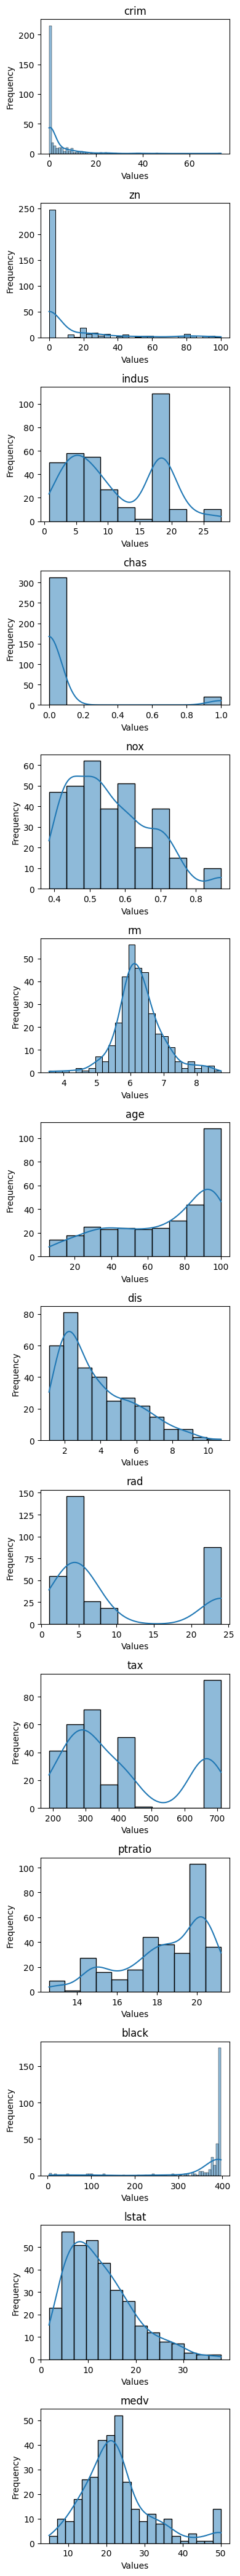

In [82]:
# Lets look at the distribution plot of the features
# Creating a figure and subplot objects
fig, axes = plt.subplots(nrows=len(data.columns), figsize=(4, 3 * len(data.columns)))

# Iterating over the columns and create distribution plots
for i, column in enumerate(data.columns):
    ax = axes[i]
    sns.histplot(data[column], kde=True, ax=ax)
    ax.set_title(column)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')

# Adjusting the layout and displaying the plots
plt.tight_layout()
plt.show()

It could be problematic because, apart from RM and MEDV, none of the other features are normally distributed. This is concerning as many statistical assumptions rely on the data being normally distributed.

In [83]:
# lets look at some descriptive stats of our features
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


Scale of our features are very different from each other, therefore we might have to rescale our data to improve our data quality, as we cannot apply PCA

**Data Normalization**

In [84]:
#Scikit Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [85]:
# Lets build our function which will perform the normaliztion
def rescale(X):
    mean = X.mean()
    std = X.std()
    scaled_X = [(i - mean)/std for i in X]
    return pd.Series(scaled_X)

In [86]:
# We will build a new dataframe
df_std = pd.DataFrame(columns=data.columns)
for i in data.columns:
    df_std[i] = rescale(data[i])

In [87]:
# Lets look at the descriptive stats now
df_std.describe().iloc[1:3:]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
mean,-6.401286e-17,3.200643e-17,8.535048e-17,-7.468167e-17,4.267524e-17,1.920386e-16,-3.200643e-17,-1.386945e-16,-8.535048e-17,2.133762e-16,8.535048e-17,-1.056212e-15,-2.133762e-16,-1.066881e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


Note : Shape of Data does not changes when rescaling, it just scales the data to give mean at 0, and standard deviation as 1 for all the features.

<ipython-input-88-56f48eca5e02>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_std[column], kde=True, ax=ax)
<ipython-input-88-56f48eca5e02>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_std[column], kde=True, ax=ax)
<ipython-input-88-56f48eca5e02>:6: UserWarning: 

`distplot` is a de

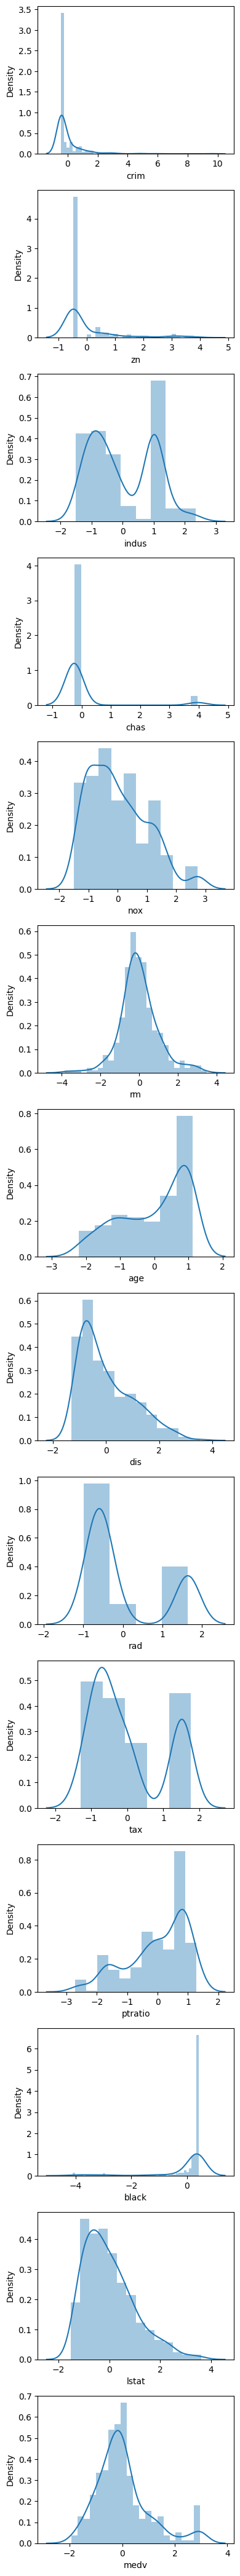

In [88]:
# lets look at the shape of data after scaling

fig, axes = plt.subplots(nrows=len(data.columns), figsize=(4, 3 * len(data.columns)))
for i, column in enumerate(df_std.columns):
    ax = axes[i]
    sns.distplot(df_std[column], kde=True, ax=ax)
plt.tight_layout()
plt.show()

As you can see, shape did not change, only the mean value shifted to 0

**PCA (Principal Component Analysis)**

In [89]:
pca = PCA(n_components=13)
X = df_std.drop('medv',axis=1)
X_pca = pca.fit_transform(X)
df_std_pca = pd.DataFrame(X_pca,columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10','PCA11','PCA12','PCA13'])
df_std_pca['medv'] = df_std['medv']

<ipython-input-90-3483a6710719>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_std_pca[i],ax=ax)
<ipython-input-90-3483a6710719>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_std_pca[i],ax=ax)
<ipython-input-90-3483a6710719>:7: UserWarning: 

`distplot` is a deprecated function and wi

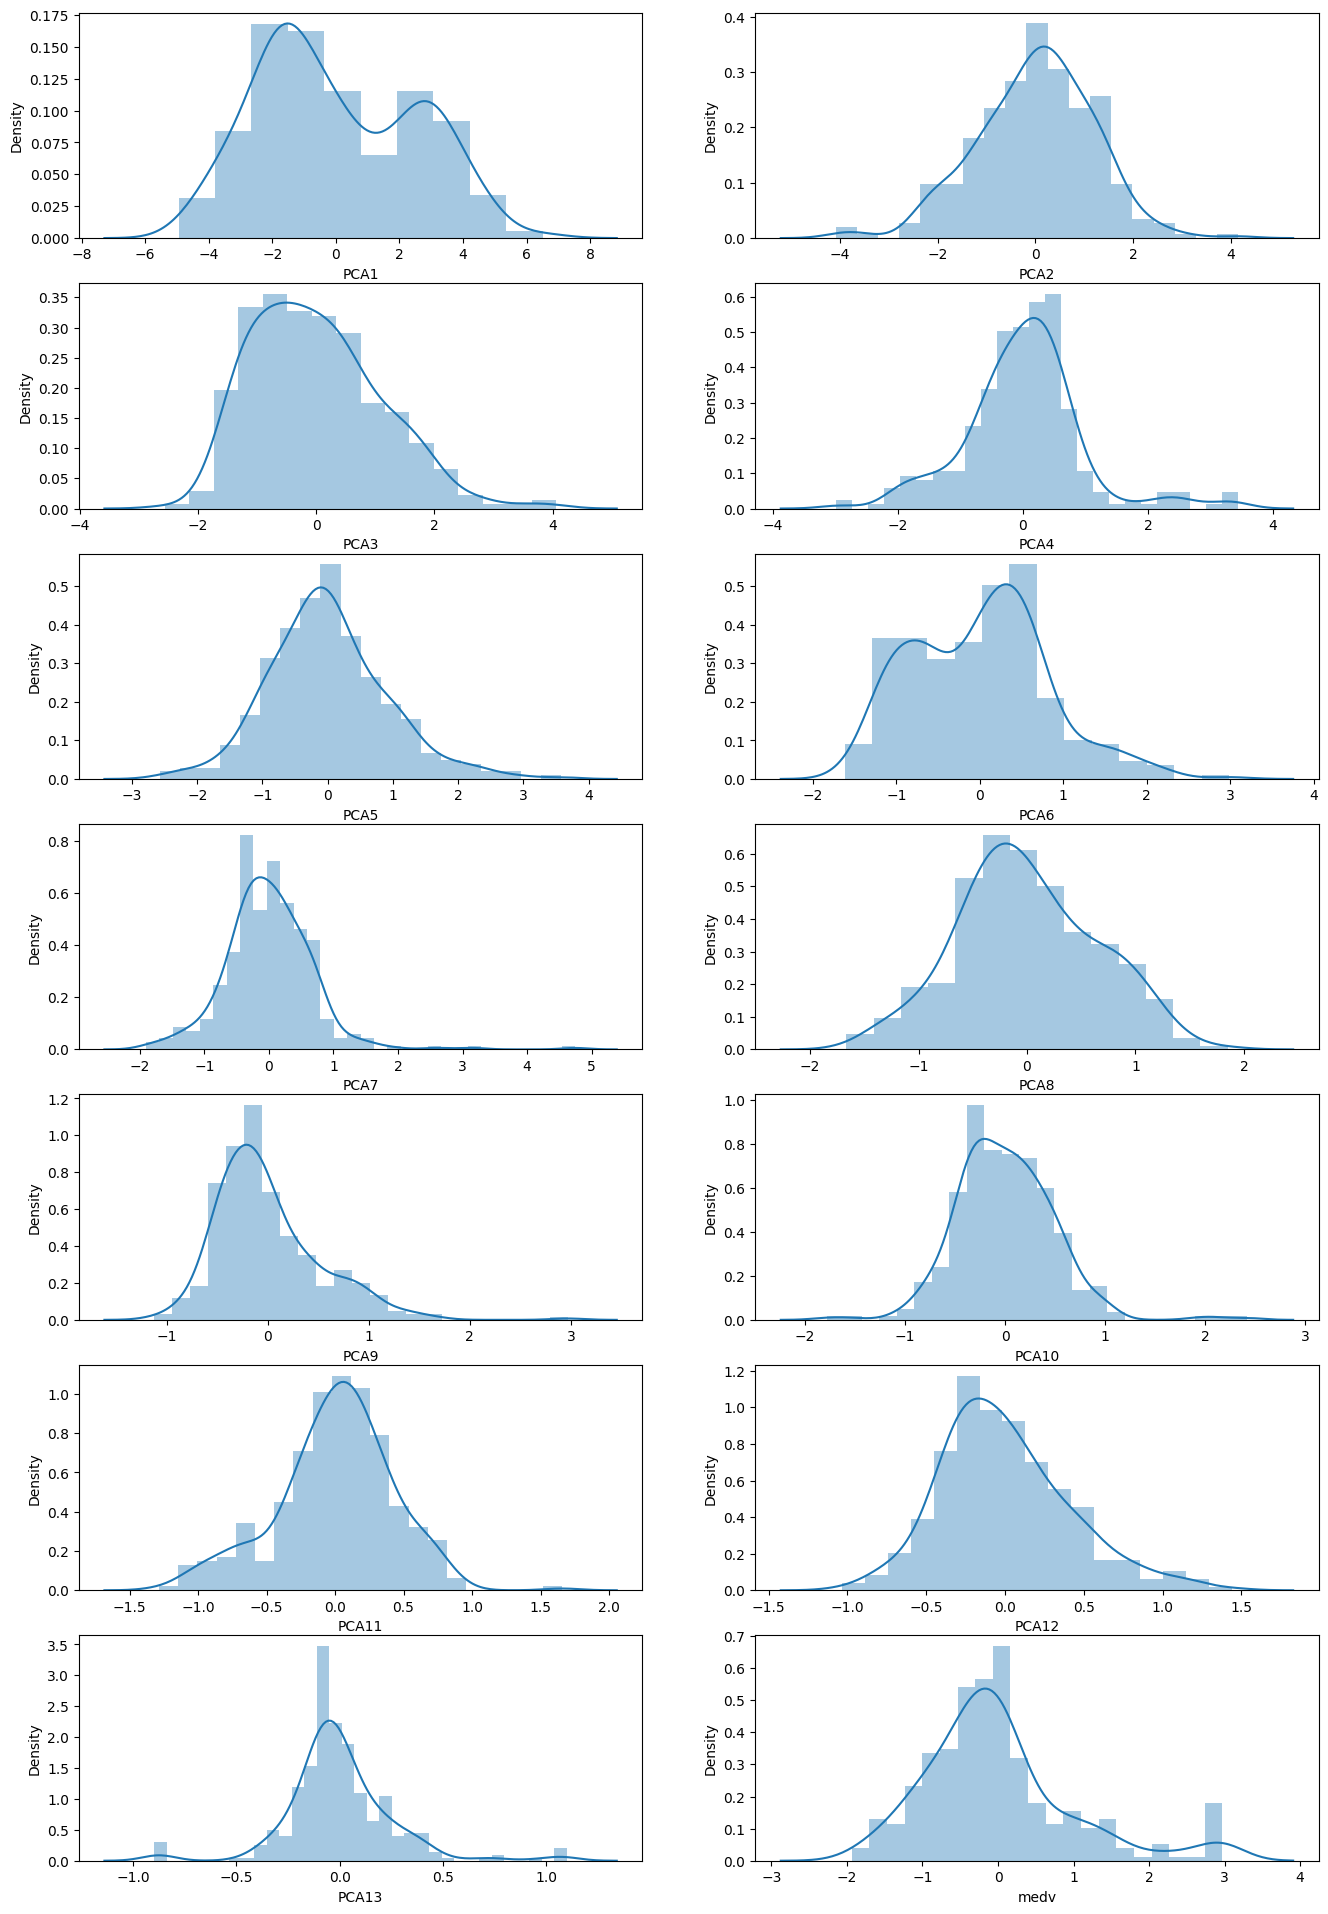

In [90]:
# Lets look at the distribution of our features after applying PCA
pos = 1
fig = plt.figure(figsize=(16,24))
for i in df_std_pca.columns:
    ax = fig.add_subplot(7,2,pos)
    pos = pos + 1
    sns.distplot(df_std_pca[i],ax=ax)

    

Now that our data is ready, we can apply our modelling techniques to it.